<a href="https://colab.research.google.com/github/nirmalghimire/DDP_Achievement-Gap/blob/main/Metacognition_USA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacognitive Readign Strategies for 15-Year-Old United States STudents

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
!pip install pyreadstat #Required to load SPSS (.sav) data
import pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00


In [2]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the SAV file into a pandas DataFrame
file_path = '/content/drive/MyDrive/Colab Notebooks/CY07_MSU_STU_QQQ_1.sav'
full_data, metadata = pyreadstat.read_sav(file_path)
print(full_data.head())
print(full_data.dtypes)

   CNTRYID  CNT  CNTSCHID  CNTSTUID  OECD  ST001D01T  ST004D01T  ST153Q01HA  \
0      8.0  ALB  800002.0  800251.0   0.0       10.0        2.0         1.0   
1      8.0  ALB  800002.0  800402.0   0.0       10.0        2.0         1.0   
2      8.0  ALB  800002.0  801902.0   0.0       10.0        1.0         1.0   
3      8.0  ALB  800002.0  803546.0   0.0       10.0        2.0         1.0   
4      8.0  ALB  800002.0  804776.0   0.0       10.0        2.0         1.0   

   ST153Q02HA  ST153Q03HA  ...  PV2READ  PV3READ  PV4READ  PV5READ  PV6READ  \
0         1.0         1.0  ...  366.610  388.501  373.728  354.077  370.415   
1         1.0         1.0  ...  425.045  448.285  433.872  447.108  432.037   
2         1.0         1.0  ...  320.458  346.658  329.878  349.492  328.967   
3         1.0         1.0  ...  417.751  385.422  415.475  376.414  445.205   
4         1.0         1.0  ...  331.580  361.722  364.681  358.006  318.300   

   PV7READ  PV8READ  PV9READ  PV10READ  test  
0  

In [4]:
usa_data = full_data[full_data['CNT'] == 'USA']
usa_data.shape


(4838, 75)

In [5]:
# Subsetting the Data
# Create a list of columns to keep
columns_to_keep = [col for col in usa_data.columns if col not in usa_data.columns[0:5] and col not in usa_data.columns[63:76]]

# Create the subset DataFrame
trunc_data = usa_data[columns_to_keep]

# Now 'data' contains the subset of your original data
print(trunc_data.dtypes)
print(trunc_data.head())
print(trunc_data.shape)

ST001D01T     float64
ST004D01T     float64
ST153Q01HA    float64
ST153Q02HA    float64
ST153Q03HA    float64
ST153Q04HA    float64
ST153Q05HA    float64
ST153Q06HA    float64
ST153Q08HA    float64
ST153Q09HA    float64
ST153Q10HA    float64
ST160Q01IA    float64
ST160Q02IA    float64
ST160Q05IA    float64
ST175Q01IA    float64
ST161Q01HA    float64
ST164Q01IA    float64
ST164Q02IA    float64
ST164Q03IA    float64
ST164Q04IA    float64
ST164Q05IA    float64
ST164Q06IA    float64
ST165Q01IA    float64
ST165Q02IA    float64
ST165Q03IA    float64
ST165Q04IA    float64
ST165Q05IA    float64
ST166Q01HA    float64
ST166Q02HA    float64
ST166Q03HA    float64
ST166Q04HA    float64
ST166Q05HA    float64
ST182Q03HA    float64
ST182Q04HA    float64
ST208Q01HA    float64
ST208Q02HA    float64
ST208Q04HA    float64
GRADE         float64
MISCED        float64
FISCED        float64
HISEI         float64
DURECEC       float64
REPEAT        float64
TMINS         float64
ESCS          float64
UNDREM    

In [6]:
# Summary of the Variables
print(trunc_data.describe())

         ST001D01T    ST004D01T   ST153Q01HA   ST153Q02HA   ST153Q03HA  \
count  4838.000000  4838.000000  4687.000000  4687.000000  4687.000000   
mean     10.086606     1.508888     1.297418     1.330915     1.272456   
std       0.506871     0.499973     0.457171     0.470593     0.445271   
min       8.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     1.000000     1.000000     1.000000   
50%      10.000000     2.000000     1.000000     1.000000     1.000000   
75%      10.000000     2.000000     2.000000     2.000000     2.000000   
max      12.000000     2.000000     2.000000     2.000000     2.000000   

        ST153Q04HA   ST153Q05HA   ST153Q06HA   ST153Q08HA   ST153Q09HA  ...  \
count  4688.000000  4680.000000  4679.000000  4677.000000  4669.000000  ...   
mean      1.214590     1.091667     1.403505     1.340389     1.493468  ...   
std       0.410582     0.288586     0.490653     0.473891     0.500011  ...   
min       1.00000

In [7]:
# Impute data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(trunc_data)
data = pd.DataFrame(imputed_data, columns=trunc_data.columns)
print(data.describe())

         ST001D01T    ST004D01T   ST153Q01HA   ST153Q02HA   ST153Q03HA  \
count  4838.000000  4838.000000  4838.000000  4838.000000  4838.000000   
mean     10.086606     1.508888     1.297418     1.330915     1.272456   
std       0.506871     0.499973     0.449978     0.463189     0.438265   
min       8.000000     1.000000     1.000000     1.000000     1.000000   
25%      10.000000     1.000000     1.000000     1.000000     1.000000   
50%      10.000000     2.000000     1.000000     1.000000     1.000000   
75%      10.000000     2.000000     2.000000     2.000000     2.000000   
max      12.000000     2.000000     2.000000     2.000000     2.000000   

        ST153Q04HA   ST153Q05HA   ST153Q06HA   ST153Q08HA   ST153Q09HA  ...  \
count  4838.000000  4838.000000  4838.000000  4838.000000  4838.000000  ...   
mean      1.214590     1.091667     1.403505     1.340389     1.493468  ...   
std       0.404165     0.283833     0.482521     0.465937     0.491198  ...   
min       1.00000

In [8]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=['UNDREM', 'METASUM', 'METASPAM'])
y_undrem = data['UNDREM']
y_metasum = data['METASUM']
y_metaspam = data['METASPAM']

In [9]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_undrem_train, y_undrem_test, y_metasum_train, y_metasum_test, y_metaspam_train, y_metaspam_test = train_test_split(
    X, y_undrem, y_metasum, y_metaspam, test_size=0.3, random_state=42)

In [10]:
# Create and train the random forest models all variables
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem = RandomForestRegressor(n_estimators=100)
model_undrem.fit(X_train, y_undrem_train)

RandomForestRegressor()

In [11]:
# B. Meta-cognition of Reading: Summarizing
model_metasum = RandomForestRegressor(n_estimators=100)
model_metasum.fit(X_train, y_metasum_train)

RandomForestRegressor()

In [12]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam = RandomForestRegressor(n_estimators=100)
model_metaspam.fit(X_train, y_metaspam_train)

RandomForestRegressor()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Make predictions on the test data
undrem_predictions = model_undrem.predict(X_test)
metasum_predictions = model_metasum.predict(X_test)
metaspam_predictions = model_metaspam.predict(X_test)

In [14]:
# Calculate and print performance metrics for training data
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Mean Squared Error for the United States: {mse}")
    print(f"{dataset_type} - Mean Absolute Error for the United States: {mae}")
    print(f"{dataset_type} - R-squared Score for the United States: {r2}")

# For UNDREM model
print("UNDREM Model:")
print_metrics(model_undrem, X_train, y_undrem_train, "Training")
print_metrics(model_undrem, X_test, y_undrem_test, "Test")

# For METASUM model
print("\nMETASUM Model:")
print_metrics(model_metasum, X_train, y_metasum_train, "Training")
print_metrics(model_metasum, X_test, y_metasum_test, "Test")

# For METASPAM model
print("\nMETASPAM Model:")
print_metrics(model_metaspam, X_train, y_metaspam_train, "Training")
print_metrics(model_metaspam, X_test, y_metaspam_test, "Test")

UNDREM Model:
Training - Mean Squared Error for the United States: 0.013340878044629863
Training - Mean Absolute Error for the United States: 0.07706496422832272
Training - R-squared Score for the United States: 0.9858577731545507
Test - Mean Squared Error for the United States: 0.08706208469594237
Test - Mean Absolute Error for the United States: 0.20184733651928033
Test - R-squared Score for the United States: 0.9075625717400048

METASUM Model:
Training - Mean Squared Error for the United States: 0.006090962304129302
Training - Mean Absolute Error for the United States: 0.04795010804670818
Training - R-squared Score for the United States: 0.9934346744015542
Test - Mean Squared Error for the United States: 0.03853757516550055
Test - Mean Absolute Error for the United States: 0.1260626085126995
Test - R-squared Score for the United States: 0.9615767642224953

METASPAM Model:
Training - Mean Squared Error for the United States: 0.0055946944641364306
Training - Mean Absolute Error for th

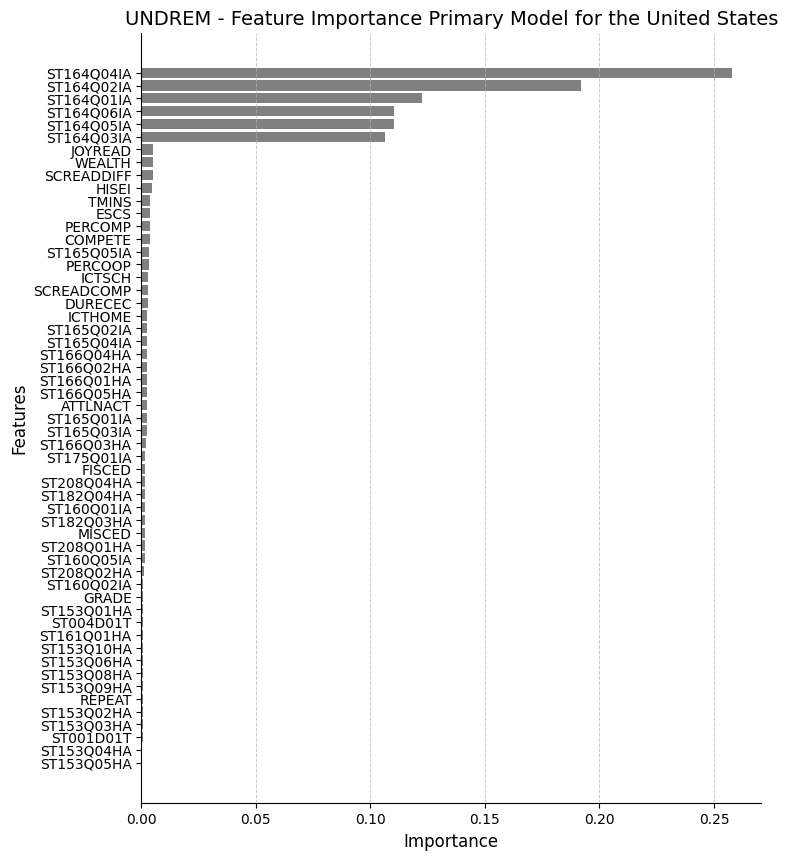

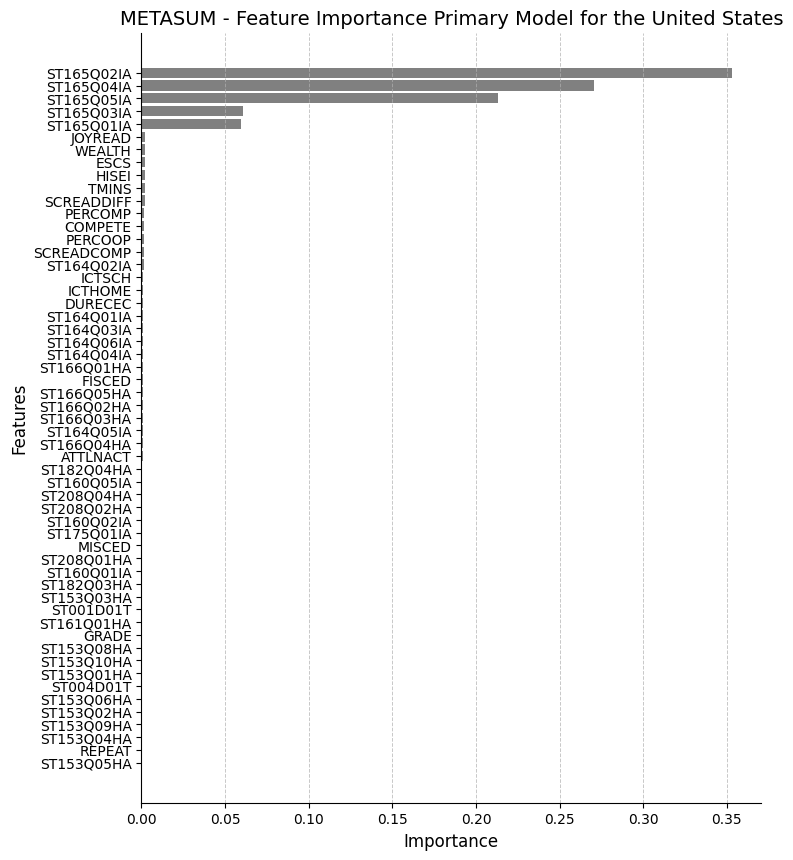

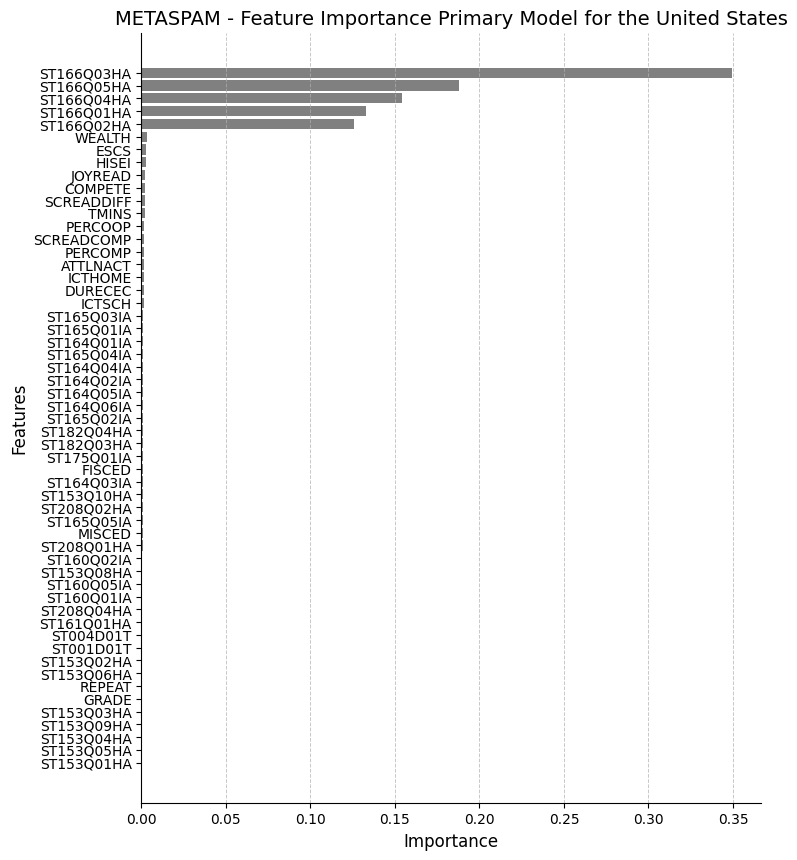

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance Primary Model for the United States', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_all_primary.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the models
undrem_feature_importances = model_undrem.feature_importances_
metasum_feature_importances = model_metasum.feature_importances_
metaspam_feature_importances = model_metaspam.feature_importances_

# Assuming X.columns gives you the feature names, call the function for each model
plot_feature_importance(undrem_feature_importances, X.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances, X.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances, X.columns, 'METASPAM')

In [16]:
# Create a DataFrame to hold the feature importance values for the UNDREM model
feature_importance_undrem_df = pd.DataFrame({'Feature': X.columns, 'Importance': undrem_feature_importances})

# Sort the DataFrame by the 'Importance' column in ascending order
feature_importance_undrem_df = feature_importance_undrem_df.sort_values(by='Importance', ascending=True)

# Print the sorted DataFrame
print(feature_importance_undrem_df)

       Feature  Importance
6   ST153Q05HA    0.000375
5   ST153Q04HA    0.000442
0    ST001D01T    0.000528
4   ST153Q03HA    0.000544
3   ST153Q02HA    0.000559
42      REPEAT    0.000630
9   ST153Q09HA    0.000654
8   ST153Q08HA    0.000675
7   ST153Q06HA    0.000675
10  ST153Q10HA    0.000676
15  ST161Q01HA    0.000710
1    ST004D01T    0.000725
2   ST153Q01HA    0.000733
37       GRADE    0.000785
12  ST160Q02IA    0.000879
35  ST208Q02HA    0.001221
13  ST160Q05IA    0.001431
34  ST208Q01HA    0.001442
38      MISCED    0.001475
32  ST182Q03HA    0.001498
11  ST160Q01IA    0.001499
33  ST182Q04HA    0.001520
36  ST208Q04HA    0.001564
39      FISCED    0.001595
14  ST175Q01IA    0.001609
29  ST166Q03HA    0.002110
24  ST165Q03IA    0.002240
22  ST165Q01IA    0.002248
53    ATTLNACT    0.002270
31  ST166Q05HA    0.002412
27  ST166Q01HA    0.002432
28  ST166Q02HA    0.002478
30  ST166Q04HA    0.002485
25  ST165Q04IA    0.002623
23  ST165Q02IA    0.002646
45     ICTHOME    0.002651
4

In [17]:
feature_importance_msum_df = pd.DataFrame({'Feature': X.columns, 'Importance': metasum_feature_importances})
feature_importance_msum_df = feature_importance_msum_df.sort_values(by='Importance', ascending=True)
print(feature_importance_msum_df)

       Feature  Importance
6   ST153Q05HA    0.000142
42      REPEAT    0.000172
5   ST153Q04HA    0.000226
9   ST153Q09HA    0.000227
3   ST153Q02HA    0.000228
7   ST153Q06HA    0.000249
1    ST004D01T    0.000256
2   ST153Q01HA    0.000265
10  ST153Q10HA    0.000312
8   ST153Q08HA    0.000336
37       GRADE    0.000350
15  ST161Q01HA    0.000353
0    ST001D01T    0.000364
4   ST153Q03HA    0.000384
32  ST182Q03HA    0.000404
11  ST160Q01IA    0.000407
34  ST208Q01HA    0.000447
38      MISCED    0.000454
14  ST175Q01IA    0.000504
12  ST160Q02IA    0.000507
35  ST208Q02HA    0.000556
36  ST208Q04HA    0.000597
13  ST160Q05IA    0.000608
33  ST182Q04HA    0.000637
53    ATTLNACT    0.000762
30  ST166Q04HA    0.000778
20  ST164Q05IA    0.000795
29  ST166Q03HA    0.000809
28  ST166Q02HA    0.000832
31  ST166Q05HA    0.000870
39      FISCED    0.000880
27  ST166Q01HA    0.000884
19  ST164Q04IA    0.000902
21  ST164Q06IA    0.000958
18  ST164Q03IA    0.000970
16  ST164Q01IA    0.001008
4

In [18]:
feature_importance_mspam_df = pd.DataFrame({'Feature': X.columns, 'Importance': metaspam_feature_importances})
feature_importance_mspam_df = feature_importance_mspam_df.sort_values(by='Importance', ascending=True)
print(feature_importance_mspam_df)

       Feature  Importance
2   ST153Q01HA    0.000194
6   ST153Q05HA    0.000216
5   ST153Q04HA    0.000226
9   ST153Q09HA    0.000229
4   ST153Q03HA    0.000242
37       GRADE    0.000251
42      REPEAT    0.000260
7   ST153Q06HA    0.000260
3   ST153Q02HA    0.000274
0    ST001D01T    0.000278
1    ST004D01T    0.000320
15  ST161Q01HA    0.000391
36  ST208Q04HA    0.000462
11  ST160Q01IA    0.000501
13  ST160Q05IA    0.000501
8   ST153Q08HA    0.000521
12  ST160Q02IA    0.000545
34  ST208Q01HA    0.000682
38      MISCED    0.000736
26  ST165Q05IA    0.000742
35  ST208Q02HA    0.000750
10  ST153Q10HA    0.000770
18  ST164Q03IA    0.000772
39      FISCED    0.000776
14  ST175Q01IA    0.000792
32  ST182Q03HA    0.000805
33  ST182Q04HA    0.000826
23  ST165Q02IA    0.000861
21  ST164Q06IA    0.000868
20  ST164Q05IA    0.000902
17  ST164Q02IA    0.000921
19  ST164Q04IA    0.000935
25  ST165Q04IA    0.000952
16  ST164Q01IA    0.000961
22  ST165Q01IA    0.001028
24  ST165Q03IA    0.001078
4

## Testing the impact of non-cognitive variables

In [19]:
# Remove Direct Impact Variables
columns_to_remove = ['ST164Q01IA', 'ST164Q02IA',
'ST164Q03IA', 'ST164Q04IA', 'ST164Q05IA', 'ST164Q06IA', 'ST165Q01IA', 'ST165Q02IA', 'ST165Q03IA', 'ST165Q04IA', 'ST165Q05IA', 'ST166Q01HA', 'ST166Q02HA', 'ST166Q03HA', 'ST166Q04HA', 'ST166Q05HA']
X_train_new = X_train.drop(columns=columns_to_remove)


In [29]:
# Train New Models
# A. Meta-cognition of Reading: Understanding and Remembering
model_undrem_new = RandomForestRegressor(n_estimators=100)
model_undrem_new.fit(X_train_new, y_undrem_train)

RandomForestRegressor()

In [30]:
# B. Meta-cognition of Reading: Summarizing
model_metasum_new = RandomForestRegressor(n_estimators=100)
model_metasum_new.fit(X_train_new, y_metasum_train)

RandomForestRegressor()

In [31]:
# C. Meta-cognition of Reading: Assessing Credibility
model_metaspam_new = RandomForestRegressor(n_estimators=100)
model_metaspam_new.fit(X_train_new, y_metaspam_train)

RandomForestRegressor()

In [32]:
# Validitaning Using Test Set
X_test_new = X_test.drop(columns=columns_to_remove)
y_undrem_pred_test_new = model_undrem_new.predict(X_test_new)
y_metasum_pred_test_new = model_metasum_new.predict(X_test_new)
y_metaspam_pred_test_new = model_metaspam_new.predict(X_test_new)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to print performance metrics
def print_metrics(model, X, y, dataset_type):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)

    print(f"{dataset_type} - Noncognitive Model: Mean Squared Error for the United States: {mse}")
    print(f"{dataset_type} - Noncognitive Model: Mean Absolute Error for the United States: {mae}")
    print(f"{dataset_type} - Noncognitive Model: R-squared Score for the United States: {r2}")

# Assuming you have training data in variables: X_train_new, y_undrem_train, y_metasum_train, y_metaspam_train

print("New UNDREM Model Performance:")
print_metrics(model_undrem_new, X_test_new, y_undrem_test, "Test")
print_metrics(model_undrem_new, X_train_new, y_undrem_train, "Train")

print("\nNew METASUM Model Performance:")
print_metrics(model_metasum_new, X_test_new, y_metasum_test, "Test")
print_metrics(model_metasum_new, X_train_new, y_metasum_train, "Train")

print("\nNew METASPAM Model Performance:")
print_metrics(model_metaspam_new, X_test_new, y_metaspam_test, "Test")
print_metrics(model_metaspam_new, X_train_new, y_metaspam_train, "Train")

New UNDREM Model Performance:
Test - Noncognitive Model: Mean Squared Error for the United States: 0.8614649898484117
Test - Noncognitive Model: Mean Absolute Error for the United States: 0.7616529451739482
Test - Noncognitive Model: R-squared Score for the United States: 0.08534687084834569
Train - Noncognitive Model: Mean Squared Error for the United States: 0.1213120092449571
Train - Noncognitive Model: Mean Absolute Error for the United States: 0.2826147725094697
Train - Noncognitive Model: R-squared Score for the United States: 0.8714011215693542

New METASUM Model Performance:
Test - Noncognitive Model: Mean Squared Error for the United States: 0.8350537496596461
Test - Noncognitive Model: Mean Absolute Error for the United States: 0.7504328164411347
Test - Noncognitive Model: R-squared Score for the United States: 0.16742382019963054
Train - Noncognitive Model: Mean Squared Error for the United States: 0.11111434431479444
Train - Noncognitive Model: Mean Absolute Error for the U

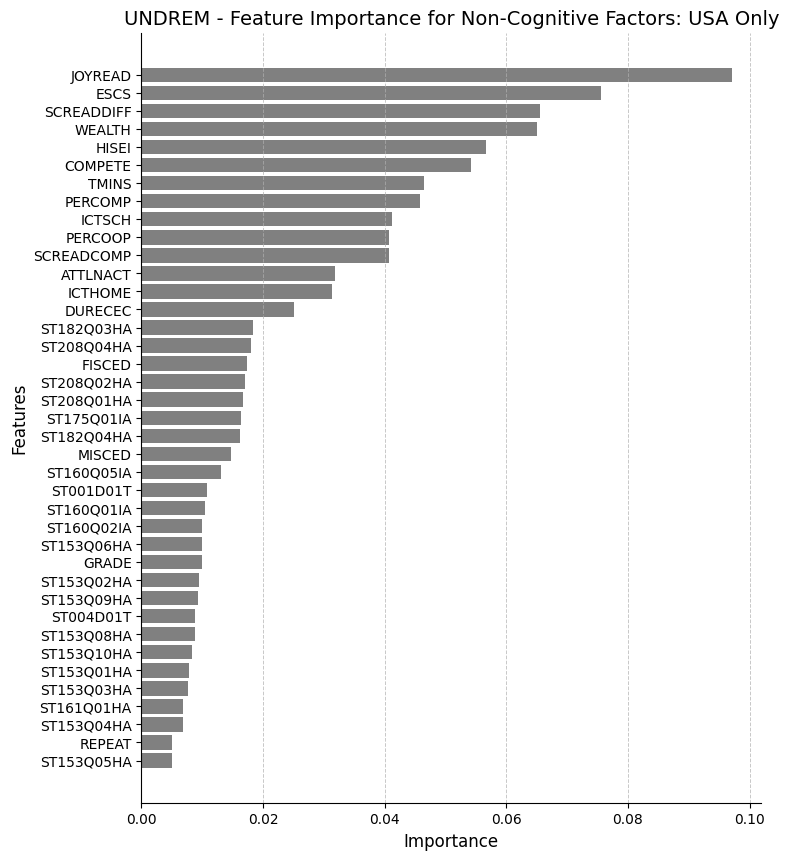

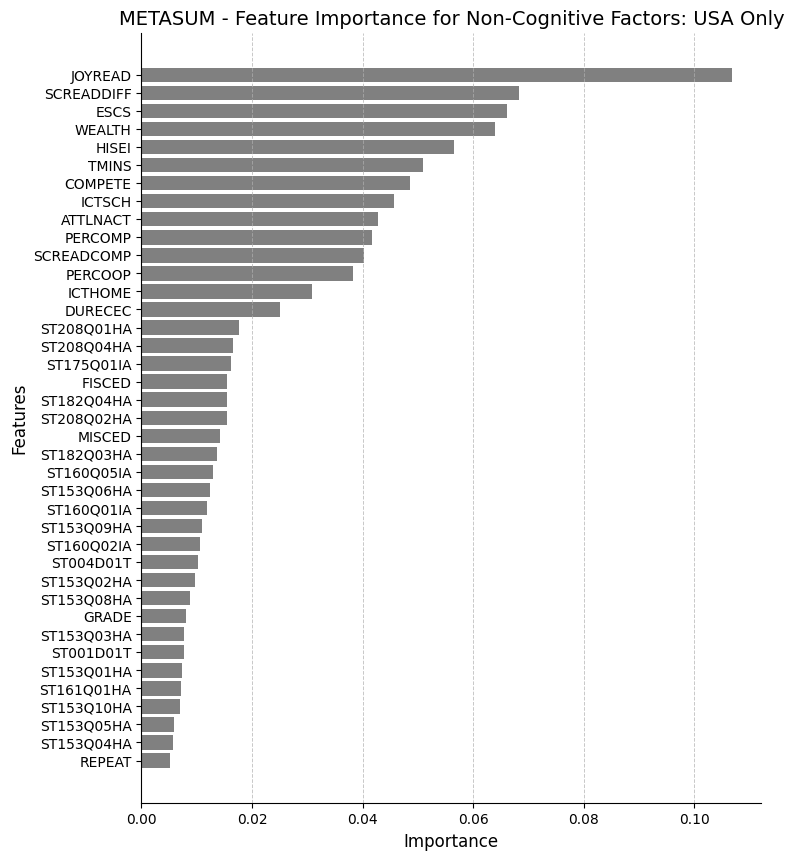

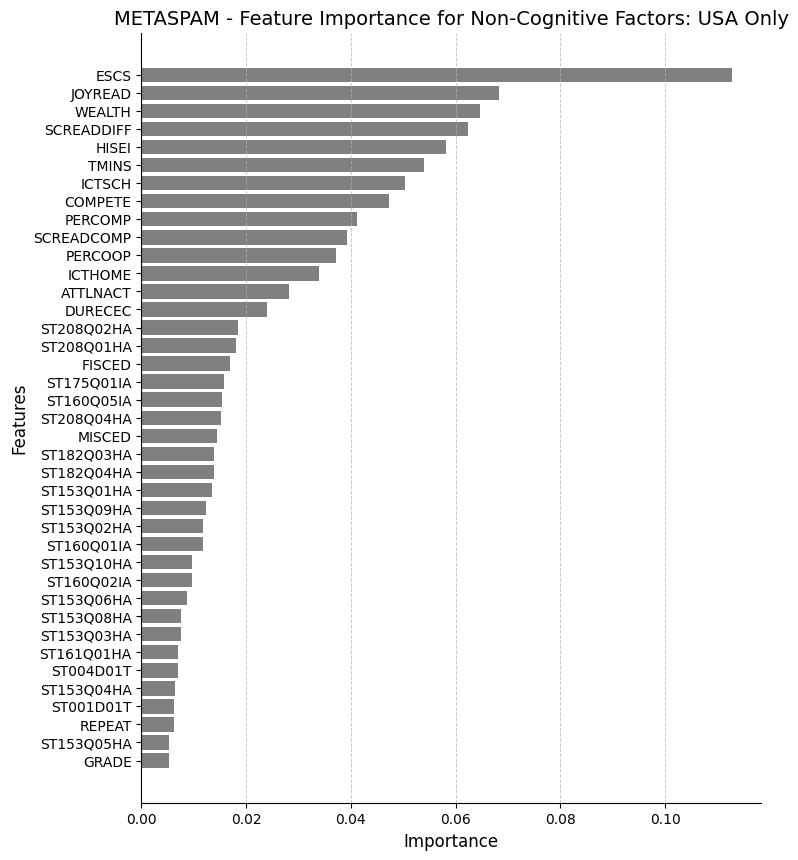

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importances and save as .png
def plot_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

    plt.figure(figsize=(8, 10))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='grey')

    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title(f'{model_name} - Feature Importance for Non-Cognitive Factors: USA Only', fontsize=14)

    plt.yticks(fontsize=10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='x', linestyle='--', alpha=0.7, linewidth=0.7)

    # Save the plot as a .png file with 600 dpi and tight bounding box
    plt.savefig(f'{model_name.lower()}_feature_importance_non_cognitive_usa.png', dpi=600, bbox_inches='tight')

    plt.show()

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
plot_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'UNDREM')
plot_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'METASUM')
plot_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'METASPAM')

In [28]:
# Function to print feature importances
def print_feature_importance(importances, feature_names, model_name):
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    print(f"Feature Importance for {model_name}")
    print("---------------------------------------")
    print(feature_importance_df)
    print("\n")

# Get feature importances from the new models
undrem_feature_importances_new = model_undrem_new.feature_importances_
metasum_feature_importances_new = model_metasum_new.feature_importances_
metaspam_feature_importances_new = model_metaspam_new.feature_importances_

# Assuming X_train_new.columns gives you the feature names, call the function for each new model
print_feature_importance(undrem_feature_importances_new, X_train_new.columns, 'New UNDREM')
print_feature_importance(metasum_feature_importances_new, X_train_new.columns, 'New METASUM')
print_feature_importance(metaspam_feature_importances_new, X_train_new.columns, 'New METASPAM')

Feature Importance for New UNDREM
---------------------------------------
       Feature  Importance
32     JOYREAD    0.097097
28        ESCS    0.075545
34  SCREADDIFF    0.065485
31      WEALTH    0.065006
24       HISEI    0.056745
38     COMPETE    0.054213
27       TMINS    0.046523
35     PERCOMP    0.045839
30      ICTSCH    0.041158
36     PERCOOP    0.040732
33  SCREADCOMP    0.040635
37    ATTLNACT    0.031806
29     ICTHOME    0.031264
25     DURECEC    0.025012
16  ST182Q03HA    0.018382
20  ST208Q04HA    0.017984
23      FISCED    0.017310
19  ST208Q02HA    0.017014
18  ST208Q01HA    0.016755
14  ST175Q01IA    0.016342
17  ST182Q04HA    0.016237
22      MISCED    0.014753
13  ST160Q05IA    0.013166
0    ST001D01T    0.010809
11  ST160Q01IA    0.010440
12  ST160Q02IA    0.010033
7   ST153Q06HA    0.009993
21       GRADE    0.009885
3   ST153Q02HA    0.009402
9   ST153Q09HA    0.009229
1    ST004D01T    0.008814
8   ST153Q08HA    0.008782
10  ST153Q10HA    0.008384
2   ST15